<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/CKD_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dataset='/content/drive/MyDrive/kidney_disease.csv'
import pandas as pd
df=pd.read_csv(dataset)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,51.397865,76.501580,1.017427,1.014479,0.396985,147.953786,56.771859,2.999372,137.641960,4.577638,12.533538,38.911846,8298.994975,4.743216,0.623116
std,16.972722,13.483688,0.005370,1.274562,1.042276,74.936198,49.477616,5.642635,9.219986,2.828414,2.719298,8.153261,2534.268707,0.836023,0.485216
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.250000,0.900000,135.000000,4.000000,10.900000,34.000000,7000.000000,4.500000,0.000000
50%,54.000000,78.234536,1.017408,0.500000,0.000000,125.000000,42.000000,1.300000,138.000000,4.400000,12.526437,38.884498,8000.000000,4.800000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,150.000000,60.750000,2.700000,141.000000,4.800000,14.675000,44.000000,9375.000000,5.100000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


<ipython-input-14-882437d30a51>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-14-882437d30a51>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-14-882437d30a51>:12: UserWarning: 

`distplot` is a deprecated function and will be removed i

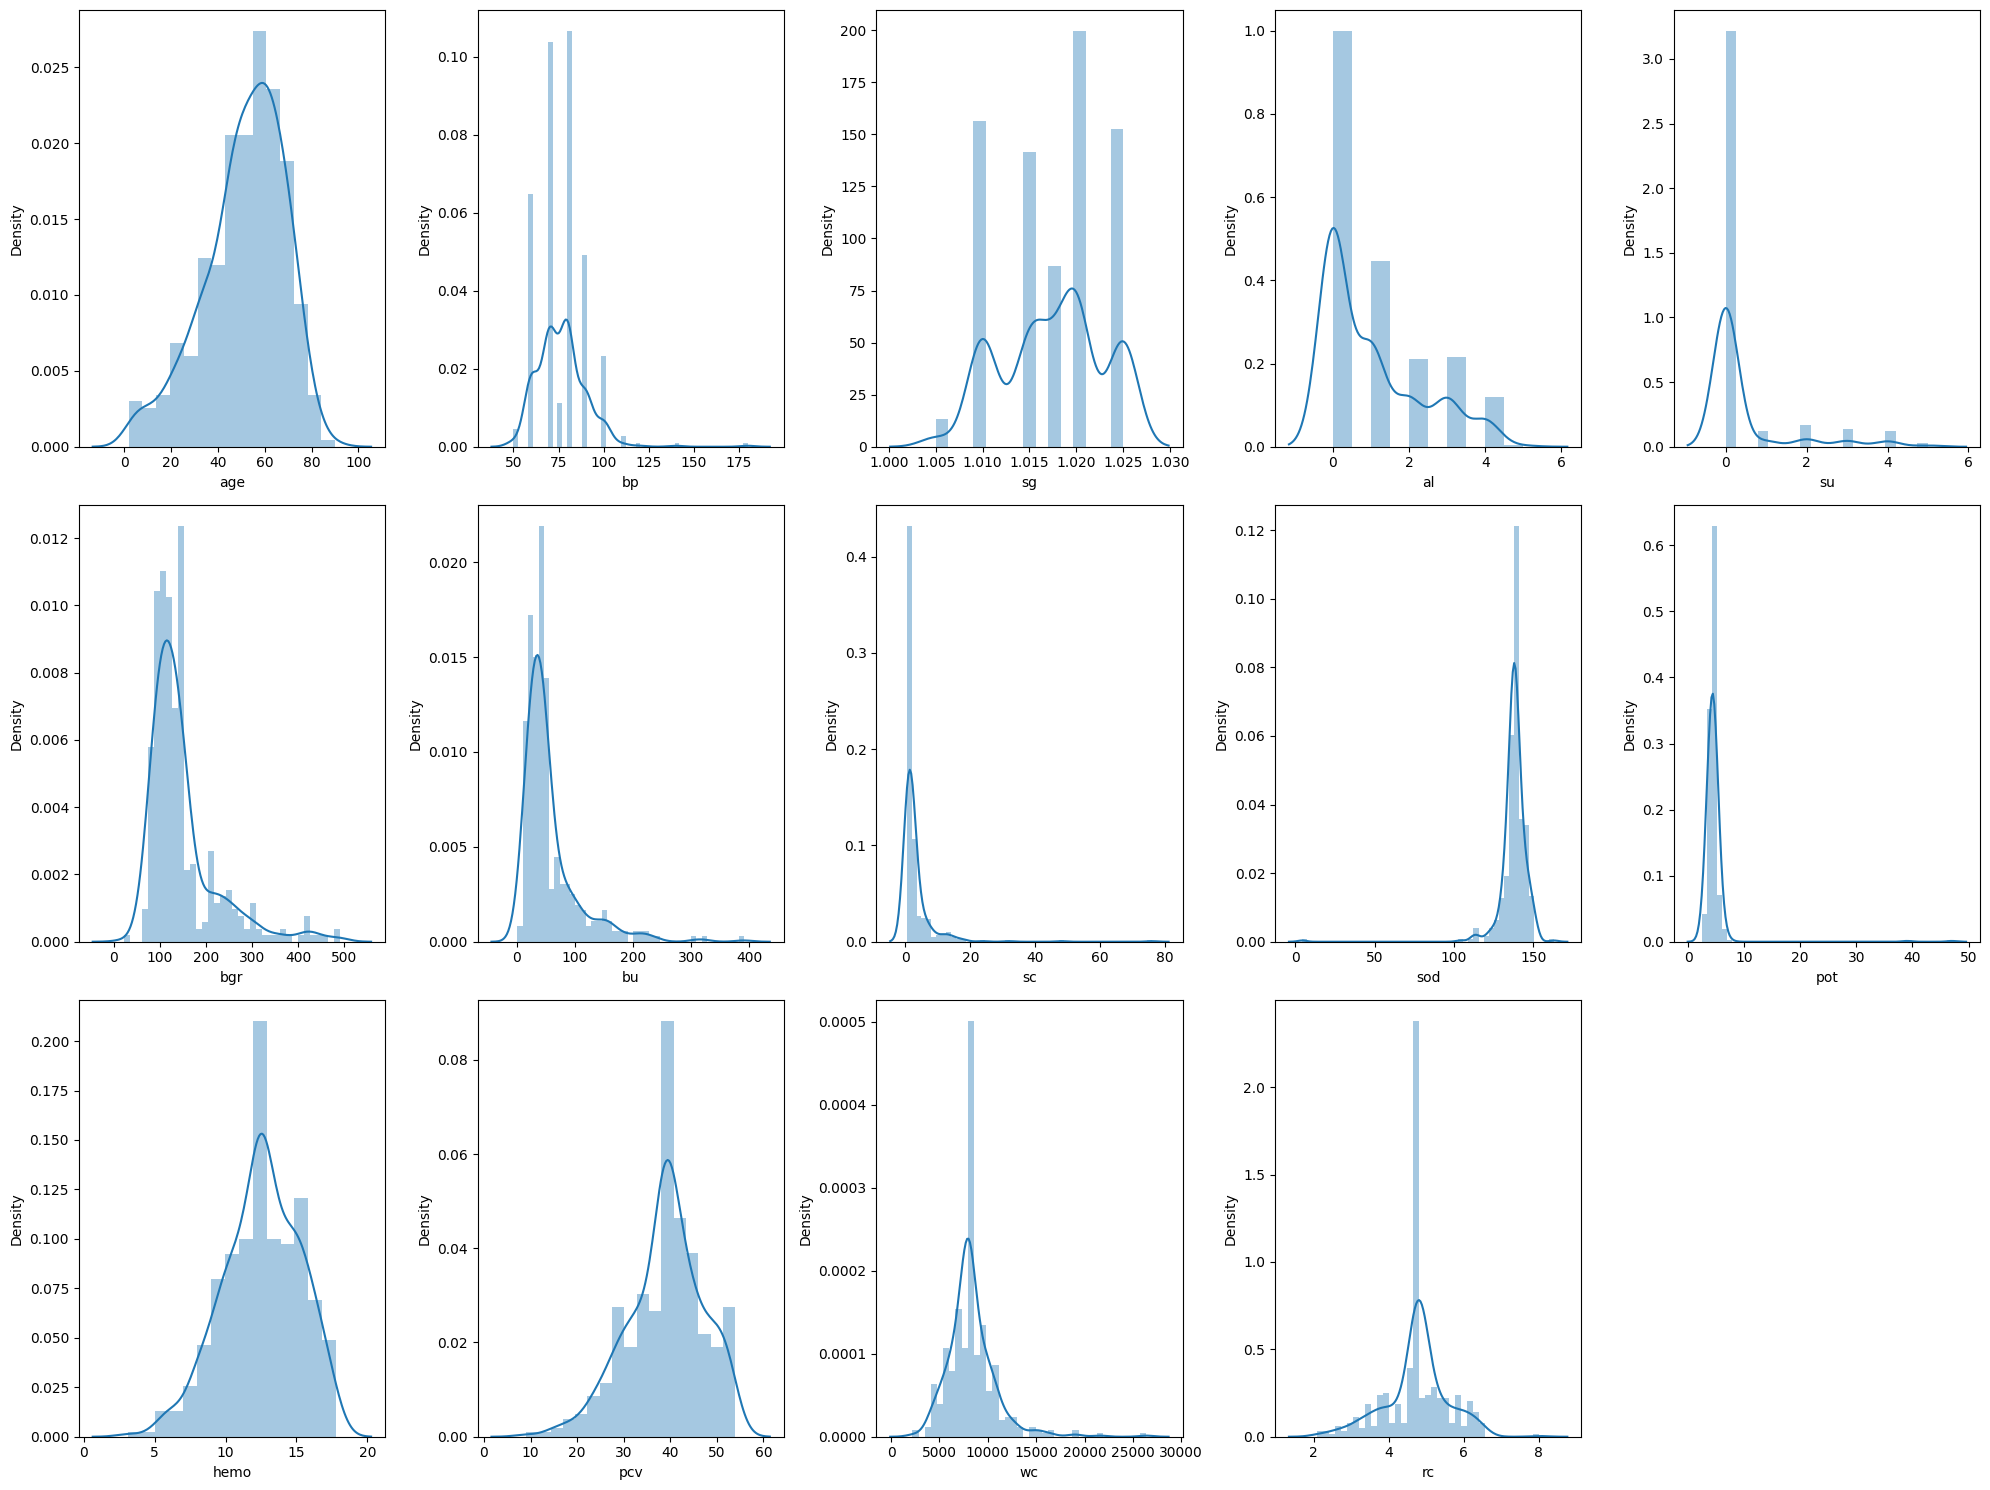

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1
num_cols = [col for col in df.columns if df[col].dtype != 'object']
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [2]:
df.drop(['id', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis =1, inplace = True)

In [3]:
# Convert 'pcv' column to numeric data type
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')
# Fill NaN values with mean or median
df['age'].fillna(df['age'].mean(), inplace=True)
df['bp'].fillna(df['bp'].mean(), inplace=True)
df['sg'].fillna(df['sg'].mean(), inplace=True)
df['al'].fillna(df['al'].mean(), inplace=True)
df['su'].fillna(df['su'].median(), inplace=True)
df['bgr'].fillna(df['bgr'].mean(), inplace=True)
df['bu'].fillna(df['bu'].median(), inplace=True)
df['sc'].fillna(df['sc'].median(), inplace=True)
df['sod'].fillna(df['sod'].median(), inplace=True)
df['pot'].fillna(df['pot'].median(), inplace=True)
df['hemo'].fillna(df['hemo'].mean(), inplace=True)
df['pcv'].fillna(df['pcv'].mean(), inplace=True)
df['wc'].fillna(df['wc'].median(), inplace=True)
df['rc'].fillna(df['rc'].median(), inplace=True)

In [4]:
# Create a mapping dictionary for label encoding
label_mapping = {'ckd': 1, 'notckd': 0}

# Perform label encoding and remove other values
df['classification'] = df['classification'].map(label_mapping)

# Drop rows with NaN values
df.dropna(subset=['classification'], inplace=True)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
# Split the data into training and testing sets
X = df.drop('classification', axis=1)
y = df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create and train a random forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the testing set
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 98.75
